In [19]:
#Workshop 1 : โหลดข้อมูลตัวเลขลายมือ

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits()  # โหลดข้อมูล digits dataset

# ตรวจสอบ keys ที่มีในข้อมูล
digits.keys()

# ดูคำอธิบาย Description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [20]:
# ดูจำนวน Samples ใน digits.data
digits.data.shape

(1797, 64)

In [21]:
# ดูจำนวน Samples ใน digits.images
digits.images.shape
# มีข้อมูลทั้งหมด 1797 แถว แต่ละแถวมี Features 8 , 8

(1797, 8, 8)

In [22]:
digits.images[:3] # ดูข้อมูล 3 ตัวแรก

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

In [23]:
digits.target.shape # ดูจำนวนข้อมูล target เป็น Arrayมิติเดียว

(1797,)

In [24]:
digits.target[:3] # taget(Label) กำกับภาพ บอกว่าข้อมูลแถวแต่ละแถวคืออะไร

array([0, 1, 2])

ข้อสรุป
1. digits.images คือ Features (ต้องนำไปreshapeก่อน เพื่อใช้เป็น X สำหรับ Train Test หรือใช้เป็น digits.data เป็น Featureแทนได้
2. digits.target คือ Label กำกับว่าข้อมูบลเป็นเลขอะไร (ซึ่งก็คือ y ของข้อมูล digits.images

In [25]:
# ดูข้อมูลในรูปภาพของตัวเลขแต่ละตัว (ข้อมูลใน เมตริกซ์)
img = digits.images[0] # เก็บภาพลำดับแรกในตัวแปร img
img.shape # ตรวจสอบขนาด มีขนาด 8 x 8
print(img) # จะได้ค่าตัวเลขใน Pixel ของลำดับแรก

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [26]:
print(np.isnan(digits.images).sum()) # ตรวจดูว่า images(target) มี missing data หรือไม่

0


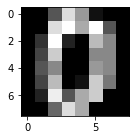

In [27]:
# Workshop 2 : แสดงภาพตัวเลข
# ถ้าต้องการแสดงแสดงตัวเลขลำดับอื่นๆ เปลี่ยน 0 เป็น 0-1796
img = digits.images[0]
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray) # ใช้แบบใดก็ได้ไม่มีผลต่อ ML
plt.show()

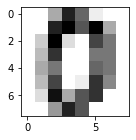

In [28]:
# แสดงภาพโหมดโทนเทา plt.cm.gray_r
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

In [29]:
#ต้องการแสดงรูปภาพทีละหลายๆลำดับ
def visual_multi(i):
    '''Plots nplots(จำนวนตัวเลขที่จะแสดง) เริ่มตัว i นับไป40 จำนวน'''
    nplots = 40
     # จำนวน Features ที่ต้องการแสดง (จำนวนกี่ภาพ)
    fig = plt.figure(figsize=(8, 4)) # กำหนดขนาด
    for j in range(nplots):
        plt.subplot(4, 10, j+1) # x Rows x n Columns
        plt.imshow(digits.images[i+j], cmap='binary') # แสดงภาพ
        plt.title(digits.target[i+j]) #ใส่ titleว่าคือเลขอะไร(Label)
        plt.axis('off') # ปิดการแสดงกรอบแกน x,y 
    plt.show()

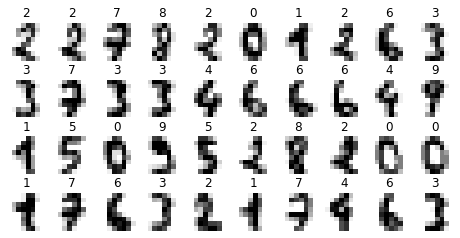

In [30]:
visual_multi(50)

In [31]:
# Workshop 3 : เตรียมข้อมูลเพื่อ Train และ Test
n_samples = len(digits.images) # นับจำนวน sample
n_samples # เพื่อ เชคจำนวนแถวที่จะ reshape
X = digits.images.reshape((n_samples, -1)) # reshape n samples
X[:3] # ดู 2 แถวแรก
y = digits.target
#y[:3] # ดู label ข้อมูล 3 ตัวแรก

In [32]:
# หรือใช้ X = digits.data ก็ได้ ไม่ต้องไปใช้ images.reshape ใน scikit-learn มีให้แล้ว
#X = digits.data
#X[:1]

In [33]:
# แบ่งข้อมูล โดยใช้คำสั่ง train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
X_train.shape, X_test.shape

((1078, 64), (719, 64))

In [77]:
#Workshop 4 : ทำการ Train Test model
#import library
from sklearn import svm
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
# predict
y_pred = model.predict(X_test)
# แสดง y predict 20 ตัวแรก
y_pred[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [36]:
# แสดง y จริง 20ตัวแรกเพื่อเทียบการทำนาย
y_test[:20]
# จะเห็นว่า 20 ตัวแรกถูกหมดแต่ใช่ว่าจะถูกทั้งหมด719ตัว

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [37]:
# ประเมิน model 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test) # ใช้  y_pred ก่อนหน้าก็ได้ไม่ต้อง predict ใหม่
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred)) # report

cm = confusion_matrix(y_test, y_pred) # Confusion Matrix
print(cm)

Accuracy Score: 0.9819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  1  0  1  2  0]
 [ 0  0  0  0 74  0  0  0  1  0]
 [ 0  0  0  0  0 70  0  0  0  1]
 [ 0  0  0  0  0  1 

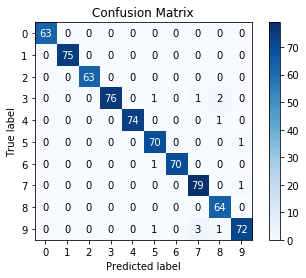

In [38]:
import matplotlib.pyplot as plt
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred) # Confusion Matrix แบบกราฟฟิก
plt.show()
# Accuracy 98.19%
# ผลการทำนาย เลข 7 และ 8 มีความผิดพลาดมากที่สุด(ทำนายผิดไป อย่างละ 4ตัว) รองมาคือ 5 , 9
# เลขอื่นถูกหมด

In [39]:
# Workshop 5 : ดูตัวเลขที่ทำนายผิด
#หาลำดับ index ที่ทำนายผิด โดยเทียบว่า y ของจริง ไม่ตรงกับ y ที่ทำนาย
idx_miss = np.where(y_test != y_pred) # y ของจริง ไม่ตรงกับ y ที่ทำนาย
idx_miss # ตำแหน่งที่การทำนายผิดพลาด

(array([ 98, 111, 268, 338, 351, 427, 434, 449, 470, 523, 562, 638, 657],
       dtype=int64),)

In [40]:
# ตรวจดูว่า index_miss นั้นตัวเลข predictคืออะไร
y_pred[idx_miss]

array([8, 9, 8, 8, 5, 5, 5, 9, 7, 8, 7, 7, 7])

In [41]:
# เปรียบเทียบกับ y จริง
y_test[idx_miss]

array([9, 5, 3, 4, 9, 3, 6, 7, 3, 3, 9, 9, 9])

In [42]:
#สาเหตุความผิดพลาดเป็นเพราะข้อมูลเหล่านี้มี Features ที่ใกล้เคียงกัน ทำให้ผลทำนายผิดพลาด

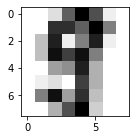

In [43]:
# ต้องการดูรูปภาพของเลขจริงๆ ที่ระบบทำนายผิด ให้ใช้ imshow แล้วระบุ
fig = plt.figure(figsize=(2,2)) # ขนาดรูป
# เนื่องจาก Features เป็น 1 x 64 ต้องทำ reshape ให้เป็น 8 x 8 ก่อนแล้วทำการพล็อตรูป
plt.imshow(X_test[idx_miss][0].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

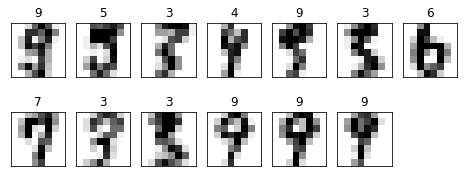

In [44]:
#กรณีที่ต้องการแสดงรูปที่ทำนายผิดทั้งหมด
fig = plt.figure(figsize = (8,3)) # ขนาดภาพ
for j,k in enumerate(idx_miss[0]):
    plt.subplot(2, 7, j+1)
    plt.imshow(X_test[k].reshape(8,8), cmap=plt.cm.gray_r)
    plt.title(y_test[k])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [76]:
# Workshop 6 : ประเมิน Cross Validation
from sklearn.model_selection import cross_val_score

model = svm.SVC(gamma='scale')

cvs = cross_val_score(model, X, y, cv=10)
print(cvs.round(4)) # ทศนิยม 4 ตำแหน่ง
cvs.mean().round(4)

[0.9444 0.9889 0.9278 0.9667 0.9833 0.9889 0.9889 0.9944 0.9609 0.9553]


0.97

In [75]:
# Work shop 7 : เปรียบเทียบกับ อัลกิริทึมอื่น
from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier(max_depth=10)
#model = DecisionTreeClassifier()
#cvs = cross_val_score(model, X, y, cv=10) # ไม่ต้อง fit model
print(cvs.round(4))
#cvs.mean().round(4)

[0.8    0.8556 0.8333 0.8056 0.7833 0.8889 0.9056 0.8101 0.8436 0.8045]


0.833

In [86]:
#Workshop 8 : เขียนตัวเลขด้วยลายมือ แล้วทำนาย
# ติดตั้ง conda install -c anaconda pillow
from PIL import Image, ImageOps

model = svm.SVC(gamma='scale')
model.fit(X,y)

imgfile = '0.png' # ไฟล์เลขที่ทำนายเก็บไว้
img = Image.open(imgfile).convert('L') # อ่านข้อมูลจากไฟล์ภาพเป็นโทนเทา(ขาวดำ)
img = ImageOps.invert(img) #กลับขาว ดำ
img = img.resize((8, 8), Image.ANTIALIAS) # scake down และทำการปรับ Anti-alias
pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม

my_digit = pixel.reshape(1,-1) # เปลี่ยนให้เป็น 1 x 64 สำหรับใช้เป็น feature
predicted = model.predict(my_digit)



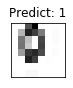

In [87]:
#พล็อตกราฟทำ Labelค่าที่ทำนายได้
plt.figure(figsize=(1,1))
plt.imshow(pixel, cmap=plt.cm.gray_r) #พล็อตตัวเลขทำนาย
plt.title('Predict: {}'.format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

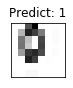

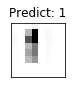

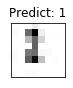

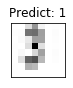

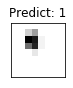

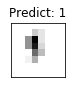

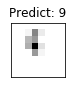

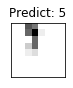

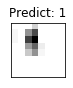

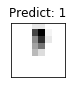

In [89]:
# Predict ทีละหลายๆไฟล์
def predict_digit(imgfile):
    img = Image.open(imgfile).convert('L') # อ่านข้อมูลจากไฟล์ภาพเป็นโทนเทา(ขาวดำ)
    img = ImageOps.invert(img) #กลับขาว ดำ
    img = img.resize((8, 8), Image.ANTIALIAS) # scake down และทำการปรับ Anti-alias
    
    pixel = np.array(img) # ขนาด 8 x 8
    pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
    pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
    my_digit = pixel.reshape(1,-1) # เปลี่ยนให้เป็น 1 x 64 สำหรับใช้เป็น feature
    predicted = model.predict(my_digit)
    #พล็อตกราฟทำ Labelค่าที่ทำนายได้
    plt.figure(figsize=(1,1))
    plt.imshow(pixel, cmap=plt.cm.gray_r) #พล็อตตัวเลขทำนาย
    plt.title('Predict: {}'.format(predicted[0]))
    plt.xticks([])
    plt.yticks([])
    plt.show()
#รายชื่อไฟล์ภาพ 
imgfiles = ['0.png','1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
for i in imgfiles:
    predict_digit(i) #วนรอบเรียกฟังก์ชันทำนาย

In [93]:
#Workshop 9 : การสร้าง Dataset ข้อมูลตัวเลขเอง

from PIL import Image, ImageOps
imgfile = 'digit0-001.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_0_001 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_0_001

array([  1,   0,  16, 112,  90,   1,   2,   0,   2,   7, 107,  57,  79,
        61,   0,   2,   0,  26,  59,   0,   0,  85,   5,   1,   0,  24,
        55,   3,   1,  60,  20,   0,   0,  18,  67,   0,   0,  82,  10,
         0,   2,   2,  97,  40,  69,  77,   0,   2,   1,   0,  15, 111,
        90,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [95]:
from PIL import Image, ImageOps
imgfile = 'digit0-002.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_0_002 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_0_002

array([  0,   1,   0,  31,  15,   0,   1,   0,   2,   0,  46, 121, 110,
        17,   1,   1,   1,   5,  93,   0,  36,  61,   0,   2,   0,   9,
        64,   3,  19,  61,   0,   2,   1,   1,  80,   0,  40,  59,   0,
         2,   2,   0,  64,  87,  95,  14,   1,   0,   0,   1,   0,  84,
        45,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0])

In [96]:
from PIL import Image, ImageOps
imgfile = 'digit0-003.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_0_003 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_0_003

array([  0,   0,   0,  18,   0,   0,   0,   0,   2,   0,  54, 128,  77,
         1,   2,   0,   1,   0,  79,   0,  78,  22,   0,   1,   0,   8,
        71,   0,  53,  27,   0,   1,   0,  10,  65,   6, 101,   7,   1,
         0,   2,   1,  84, 131,  37,   0,   2,   0,   1,   0,  10,  19,
         0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0])

In [97]:
from PIL import Image, ImageOps
imgfile = 'digit1-001.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_1_001 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_1_001

array([  0,   0,   0,   6,   2,   0,   0,   0,   1,   0,  24, 123,   2,
         1,   0,   0,   2,   0,  57, 101,   4,   0,   0,   0,   0,   1,
         0,  53,   2,   0,   0,   0,   0,   1,  10,  99,  37,   0,   1,
         0,   2,   0,  52, 121,  56,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   3,   2,   0,   0,   0])

In [98]:
from PIL import Image, ImageOps
imgfile = 'digit1-002.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_1_002 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_1_002

array([  0,   0,   2,  23,   0,   1,   0,   0,   2,   0,  62, 103,   0,
         3,   0,   0,   1,   0,  84,  74,   0,   2,   0,   0,   1,   0,
        16,  59,   0,   2,   0,   0,   1,   0,  21,  58,   0,   2,   0,
         0,   1,   0,  14,  68,   0,   2,   0,   0,   1,   0,  94, 144,
        34,   0,   2,   0,   0,   0,  11,   1,   2,   0,   0,   0])

In [99]:
from PIL import Image, ImageOps
imgfile = 'digit1-003.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_1_003 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_1_003

array([  0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   7, 116,   6,
         0,   0,   0,   0,   1,   7,  90,  12,   0,   0,   0,   0,   1,
         0,  63,   8,   0,   0,   0,   0,   0,   0,  68,   2,   1,   0,
         0,   2,   0,  45, 139, 113,  14,   0,   1,   0,   0,   6,   8,
         5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
from PIL import Image, ImageOps
imgfile = 'digit2-001.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_2_001 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_2_001

array([  0,   0,   9,  31,   0,   1,   0,   0,   2,   0,  61, 129,  16,
         1,   1,   0,   0,   1,  10,  44,  52,   0,   2,   0,   0,   2,
         0,  89,  15,   1,   0,   0,   3,   0,  97, 100,  19,   2,   1,
         0,   2,   0,  70,  97,  45,   0,   2,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   3,   3,   2,   0,   0,   0])

In [109]:
from PIL import Image, ImageOps
imgfile = 'digit2-002.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_2_002 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_2_002

array([  0,   0,   0,   5,   0,   0,   0,   0,   1,   0,  10, 131,  34,
         0,   1,   0,   0,   1,   8,  50,  56,   0,   2,   0,   0,   2,
         0,  38,  50,   0,   2,   0,   0,   2,   0,  65,   9,   0,   0,
         0,   1,   0,  23, 133,  54,   1,   0,   0,   1,   0,  19,  85,
        56,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [110]:
from PIL import Image, ImageOps
imgfile = 'digit2-003.png'
img = Image.open(imgfile).convert('L') # อ่านข้อมูลโทนเทา
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS) 

pixel = np.array(img) # ขนาด 8 x 8
pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
pixel

digit_2_003 = pixel.reshape(1,-1)[0] # ข้อมูล Feature 0 (1x64)
digit_2_003

array([  0,   0,   1,  26,   0,   0,   0,   0,   1,   0,  23, 130,  33,
         0,   1,   0,   0,   1,   4,  22,  59,   0,   2,   0,   0,   2,
         0,  60,  48,   0,   2,   0,   0,   1,   9,  84,   0,   1,   0,
         0,   3,   0,  66,  95,  19,   2,   1,   0,   1,   0,  33,  90,
        57,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [112]:
import pandas as pd

df = pd.DataFrame([digit_0_001])
df = df.append([digit_0_002])
df = df.append([digit_0_003])
df = df.append([digit_1_001])
df = df.append([digit_1_002])
df = df.append([digit_1_003])
df = df.append([digit_2_001])
df = df.append([digit_2_002])
df = df.append([digit_2_003])
df
# Target/Label เพื่อระบุ Features ใน df 
y = [0,0,0,1,1,1,2,2,2]

X = df
model.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

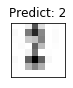

In [119]:
def predict_digit(imgfile):
    img = Image.open(imgfile).convert('L') # อ่านข้อมูลจากไฟล์ภาพเป็นโทนเทา(ขาวดำ)
    img = ImageOps.invert(img) #กลับขาว ดำ
    img = img.resize((8, 8), Image.ANTIALIAS) # scake down และทำการปรับ Anti-alias
    
    pixel = np.array(img) # ขนาด 8 x 8
    pixel - pixel / 255.0 *16 # ปรับค่าจาก 0-255 ให้เป็น 0-1 *16 = 0-19
    pixel = pixel.astype('int') # เปลี่ยนเป็นจำนวนเต็ม
    my_digit = pixel.reshape(1,-1) # เปลี่ยนให้เป็น 1 x 64 สำหรับใช้เป็น feature
    predicted = model.predict(my_digit)
    #พล็อตกราฟทำ Labelค่าที่ทำนายได้
    plt.figure(figsize=(1,1))
    plt.imshow(pixel, cmap=plt.cm.gray_r) #พล็อตตัวเลขทำนาย
    plt.title('Predict: {}'.format(predicted[0]))
    plt.xticks([])
    plt.yticks([])
    plt.show()
#รายชื่อไฟล์ภาพ 
imgfiles = ['digit_pred.png']
for i in imgfiles:
    predict_digit(i) #วนรอบเรียกฟังก์ชันทำนาย